In [1]:
import tensorflow as tf

2022-08-05 15:45:32.810831: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [6]:
import rasterio

In [7]:
import matplotlib.pyplot as plt

In [8]:
import numpy as np

In [10]:
path = r'/home/skymap/big_data/Dao_work_space/test_data_moi/data_train_new_mask/datatrain/label/buildingdubai_mask_box_10000.tif'
with rasterio.open(path,'r') as src:
    im = src.read()
im.shape

(1, 256, 256)

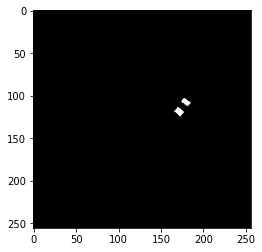

In [11]:
import matplotlib.pyplot as plt

plt.imshow(im[0,:,:], cmap = 'gray')
plt.show()

In [11]:
np.unique(im)

array([  0,  50, 150, 250], dtype=uint8)

In [12]:
path = r'/home/skymap/big_data/Dao_work_space/test_train_multiclass/train_masks_grey_cropped_768.tif'
with rasterio.open(path,'r') as src:
    im1 = src.read()
im1.shape

/home/skymap/anaconda3/envs/farm_api38/lib/python3.8/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


(1, 768, 768)

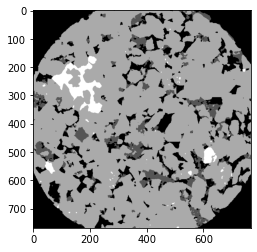

In [14]:
import matplotlib.pyplot as plt

plt.imshow(im1[0,:,:], cmap = 'gray')
plt.show()

In [15]:
np.unique(im1)

array([1, 2, 3, 4], dtype=uint8)

In [21]:
a = []
b = np.array([1,2,0])


In [22]:
a.append(list(b))

In [23]:
a

[[1, 2, 0]]

In [24]:
a = np.array(a)

In [25]:
a

array([[1, 2, 0]])

In [13]:
import numpy as np

In [14]:
import rasterio

In [50]:
path_im1 = r'/home/skymap/big_data/Dao_work_space/test_data_moi/mask/buildingdubai_mask_BD.tif'
path_im2 = r'/home/skymap/big_data/Dao_work_space/test_data_moi/mask/buildingdubai_mask_EBE.tif'
path_im3 = r'/home/skymap/big_data/Dao_work_space/test_data_moi/image/buildingdubai_mask.tif'


In [16]:
with rasterio.open(path_im1,'r') as i:
    im1 = i.read()
im1.shape

(1, 18662, 12476)

In [42]:
with rasterio.open(path_im2,'r') as i:
    im2 = i.read()
im2.shape

(1, 18662, 12476)

In [51]:
with rasterio.open(path_im3,'r') as i:
    im3 = i.read()
im3.shape

(3, 18662, 12476)

In [19]:
im4 = np.stack([im1,im2,im3],axis = -1)

In [20]:
im4.shape

(1, 18662, 12476, 3)

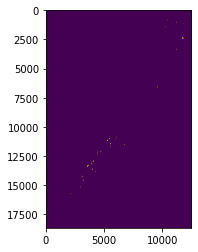

In [32]:
import matplotlib.pyplot as plt
plt.imshow(im4[0,:,:,0:1],interpolation_stage = 'rgba')
plt.show()

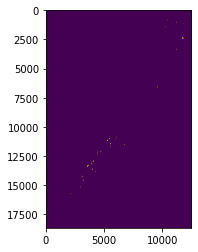

In [37]:
import matplotlib.pyplot as plt
plt.imshow(im1[0,:,:],interpolation_stage = 'rgba')
plt.show()

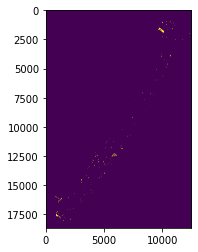

In [41]:
import matplotlib.pyplot as plt
plt.imshow(im3[0,:,:],interpolation_stage = 'rgba')
plt.show()

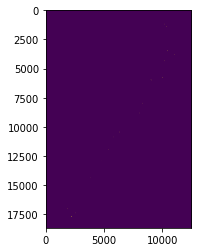

In [43]:
import matplotlib.pyplot as plt
plt.imshow(im2[0,:,:],interpolation_stage = 'rgba')
plt.show()

In [44]:
import rasterio
import geopandas as gp
import numpy as np
import glob
import os

path_dir_img =r'/home/skymap/big_data/Dao_work_space/test_data_moi/mask'
list_img = []
outpath_label = r'/home/skymap/big_data/Dao_work_space/test_data_moi/mask4.tif'


for path in glob.glob(os.path.join(path_dir_img,'*.tif')):
    with rasterio.open(path,'r') as src:
        meta = src.meta
        im1 = src.read().astype(np.uint8)
        list_img.append(im1)
#mask = np.concatenate(list_img,axis = -1)
mask = np.stack(list_img,axis = -1)
print(len(list_img))

#mask = (list_img[0]*100)+ (list_img[1]*150) + (list_img[2]*255)
print(mask.shape)

    

3
(1, 18662, 12476, 3)


In [48]:
mask[0,:,:,0] == mask[0,:,:,1]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [49]:
out_meta1 = meta
out_meta1.update({"driver": "GTiff",
                       
                        "count":3,
                        "nodata": 0})
with rasterio.open(outpath_label, "w", compress='lzw', **out_meta1) as dst:
    dst.write((mask[0,:,:,0]*255).astype(np.uint8), 1)
    dst.write((mask[0,:,:,1]*255).astype(np.uint8), 2)
    dst.write((mask[0,:,:,2]*255).astype(np.uint8), 3)

ERROR 1: PROJ: proj_create_from_name: /home/skymap/anaconda3/envs/tf27/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
